In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:>

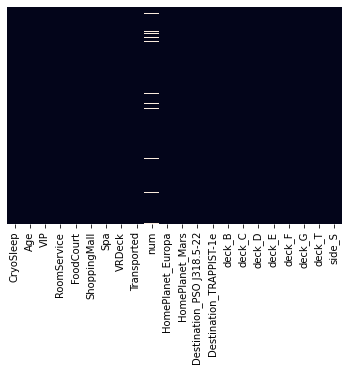

In [46]:
sns.heatmap(traindf.isnull(),yticklabels=False,cbar=False)

In [29]:
def cleandata(data):
    df = data.copy()
    
    df["VIP"] = df["VIP"].astype(bool)
    df["VIP"] = df["VIP"].astype(int)
    
    df["CryoSleep"] = df["CryoSleep"].astype(bool)
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    df["Transported"] = df["Transported"].astype(int)
    
    df.drop(['PassengerId', 'Name','Cabin'],axis=1,inplace=True)
    
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
    df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
    
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
    df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())
    df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
    df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
    df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
    
    return df

In [34]:
train_df = cleandata(train)

In [45]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


In [36]:
traindf = pd.get_dummies(train_df, columns=['HomePlanet','Destination','deck','side'], drop_first=True)

In [40]:
traindf.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [44]:
traindf

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,98,...,0,0,0,0,0,0,0,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1499,...,1,0,0,0,0,0,0,1,0,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1500,...,0,1,0,0,0,0,0,1,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,608,...,0,0,0,0,0,1,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(traindf, test_size=0.2, random_state=42)

In [10]:
y_train = train_set['Transported']
X_train = train_set.drop(['Transported'], axis=1)

y_val = test_set['Transported']
X_val = test_set.drop(['Transported'], axis=1)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train) 

LogisticRegression(max_iter=300)

In [12]:
y_val_preds = model.predict(X_val)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_preds)

0.7763082231167338

In [15]:
test = pd.read_csv('test.csv')
test_df = cleandata(test)
testids = test['PassengerId']
X_test = pd.get_dummies(test_df, columns=['HomePlanet','Destination'], drop_first=True)

In [16]:
preds = model.predict(X_test)

In [17]:
preds

array([1, 0, 1, ..., 1, 1, 1])

In [18]:
df_output = pd.DataFrame({'PassengerId':testids,
                          'Transported':preds.astype('bool')})

In [20]:
df_output.to_csv('sub02.csv',index=False)

In [21]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [25]:
deck = list(train['Cabin'])

In [26]:
deck01 = deck.split('/')

AttributeError: 'list' object has no attribute 'split'

In [27]:
train[['deck','num','side']] = train['Cabin'].str.split('/',expand=True)

In [28]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S
